Ridge (L2) - Train RMSE: 5.54, Test RMSE: 5.12
Lasso (L1) - Train RMSE: 5.71, Test RMSE: 5.31
Elastic Net - Train RMSE: 5.87, Test RMSE: 5.37


/Users/youcefs/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

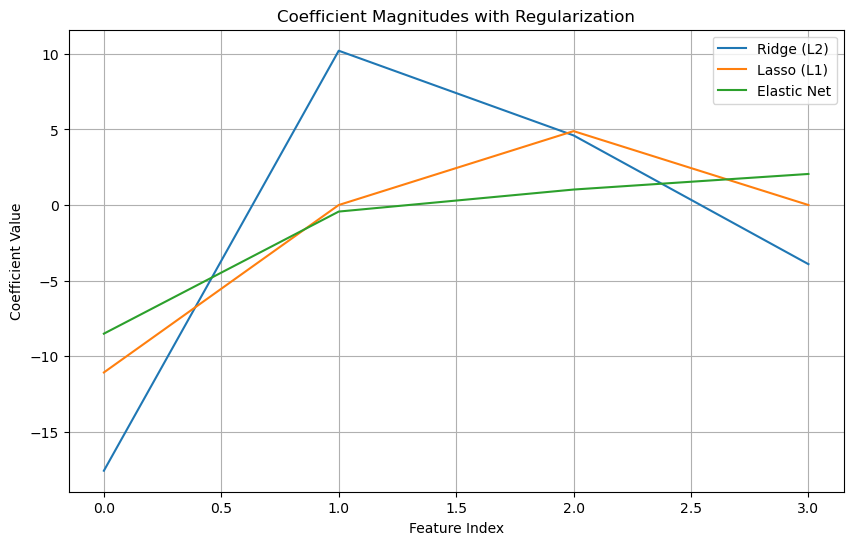

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston  # Use Boston dataset

# Load Dataset
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)  # Features
y = pd.DataFrame(boston.target, columns=["MEDV"])  # Target

# Use only one feature for simplicity
X = X[['LSTAT']]  # % lower status of the population
y = y.values  # Convert to numpy array for compatibility

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best Polynomial Degree Determined Previously (Assume 4 for this Example)
best_degree = 4
poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Standardize Features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Models
models = {
    "Ridge (L2)": Ridge(alpha=1.0),
    "Lasso (L1)": Lasso(alpha=0.1, max_iter=10000),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
}

# Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train_poly_scaled, y_train)
    y_train_pred = model.predict(X_train_poly_scaled)
    y_test_pred = model.predict(X_test_poly_scaled)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f"{name} - Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")

# Visualize Coefficients for Regularization Effects
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1, max_iter=10000)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)

# Fit models
ridge.fit(X_train_poly_scaled, y_train)
lasso.fit(X_train_poly_scaled, y_train)
elastic_net.fit(X_train_poly_scaled, y_train)

# Plot coefficients
coefficients = {
    "Ridge (L2)": ridge.coef_,
    "Lasso (L1)": lasso.coef_,
    "Elastic Net": elastic_net.coef_
}

plt.figure(figsize=(10, 6))
for name, coef in coefficients.items():
    plt.plot(range(len(coef.flatten())), coef.flatten(), label=name)

plt.title("Coefficient Magnitudes with Regularization")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()